<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout14_Importance_of_PredictorVariables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #14: Understanding the Importance of Individual Predictor Variables

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## MN Gay Marriage Amendment

Consider the following data collected on counties from all across Minnesota.  The goal here is to investigate the relationship between the outcome from the 2012 ballot measure to restrict marriage between a man and women in the State of MN and various demographics. 

<u>Note:</u> A vote of 'Yes" indicates marriage should be only be defined as the union of one man and one women.
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li>Response Variable: Percent Voted Yes for Amendment #1</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>% Voted Democrat</li>
          <li>% Voted Republican</li>
          <li>Population Per Square Mile</li>
          <li>Per Capita Income</li>
          <li>Average Household Size</li>
          <li>% Bachelor or higher Education</li>
          <li>% Unemployment</li>
          <li>% Population Living in Poverty</li>
          <li>% of Population: Age 0-17</li>
          <li>% of Population: Age 18-24</li>
          <li>% of Population: Age 25-44</li>
          <li>% of Population: Age 45-64</li>
          <li>% of Population: Age 65 and Over</li>
          <li>% of Population: White</li>
          <li>% of Population: African American</li>
          <li>% of Population: American Indian</li>
          <li>% of Population: Asian</li>
          <li>% of Population: Other</li>
          <li>% of Population: Of Hispanic Origin</li>
         </ul>
     </ul>
    </td>
    <td width='50%'>
    <p align='center'><img src="https://drive.google.com/uc?export=view&id=1yat57mNueWJ95pux9YstUjp2JuTc7E9t" width="50%" height="50%"></img></p>
      
  </td>
</tr>

</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>




## Load tidyverse

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [ ]:
#@title Load Tidyverse
#load tidyverse package
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()





---




## Load the initial data

In [ ]:
# Reading data in using read_csv 
MN_Marriage_Amendment <- read_csv("http://www.StatsClass.org/stat360/Datasets/MN_Marriage_Amendment.csv")

Rows: 87 Columns: 23

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): State, County
dbl (21): FIPSCode, Pct_Yes, Pct_Democrat, Pct_Republican, PopPerSqMile, Per...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Taking a quick look at the initial data...

In [ ]:
head(MN_Marriage_Amendment)

FIPSCode,State,County,Pct_Yes,Pct_Democrat,Pct_Republican,PopPerSqMile,PerCapitaIncome,AvgHousehold Size,Pct_Bachelororhigher,⋯,Pct_Age18to24,Pct_Age25to44,Pct_Age45to64,Pct_Age65andOlder,Pct_RaceWhite,Pct_RaceAfricanAmerican,Pct_RaceAmericanIndian,Pct_RaceAsian,Pct_RaceOther,Pct_Hispanic
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27001,MN,"Aitkin County, MN",61.82,48.4,49.8,8.9,24694,2.06,15.1,⋯,5.1,16.9,32.8,28.5,96,0.4,2.4,0.2,0.2,0.9
27003,MN,"Anoka County, MN",50.61,47.7,50.3,782.1,29894,2.70,25.8,⋯,8.1,27.8,28.4,10.8,87,4.0,1.0,4.0,1.5,3.6
27005,MN,"Becker County, MN",62.92,41.8,56.4,24.7,25233,2.38,21.4,⋯,6.8,21.7,29.5,18.3,88,0.4,8.0,0.4,0.3,1.2
27007,MN,"Beltrami County, MN",51.08,53.8,43.9,17.7,21753,2.56,29.1,⋯,14.6,22.3,25.1,13.7,75,0.6,20.0,0.7,0.3,1.5
27009,MN,"Benton County, MN",55.39,41.9,55.6,94.2,23924,2.48,18.8,⋯,10.7,28.5,24.2,12.8,95,1.9,0.4,1.1,0.4,1.6
27011,MN,"Big Stone County, MN",67.05,48.3,49.8,10.6,24960,2.15,16.8,⋯,5.6,18.4,29.8,25.4,98,0.2,0.4,0.1,0.3,0.8




---



---



## Correlation Analysis

A complete correlation analysis should be conducted to avoid issues related to multicollinearity.

In [ ]:
cor(MN_Marriage_Amendment[,4:23])

,Pct_Yes,Pct_Democrat,Pct_Republican,PopPerSqMile,PerCapitaIncome,AvgHousehold Size,Pct_Bachelororhigher,Pct_Unemployment,Pct_Poverty,Pct_Age0to17,Pct_Age18to24,Pct_Age25to44,Pct_Age45to64,Pct_Age65andOlder,Pct_RaceWhite,Pct_RaceAfricanAmerican,Pct_RaceAmericanIndian,Pct_RaceAsian,Pct_RaceOther,Pct_Hispanic
Pct_Yes,1.00000000,-0.64541723,0.64855039,-0.53041263,-0.58523594,-0.22417766,-0.80645228,-0.13263376,0.021101708,0.05515810,-0.4696915847,-0.51759911,0.197154870,0.56205416,0.35410407,-0.62448520,-0.0427026098,-0.49015819,0.06715177,0.033356164
Pct_Democrat,-0.64541723,1.00000000,-0.99894342,0.37191654,0.11144680,-0.22015197,0.33506309,0.06280675,0.325941638,-0.36309429,0.2898317955,-0.02059607,0.016021439,-0.01768341,-0.40693647,0.39436745,0.2340664416,0.25613803,0.05432809,0.081442613
Pct_Republican,0.64855039,-0.99894342,1.00000000,-0.36857228,-0.10841808,0.22121860,-0.33302413,-0.06055333,-0.320401128,0.36874121,-0.2960284709,0.01717944,-0.014030942,0.02074151,0.39367509,-0.39157020,-0.2237497669,-0.25029886,-0.04548360,-0.073722569
PopPerSqMile,-0.53041263,0.37191654,-0.36857228,1.00000000,0.47466412,0.15928657,0.55810156,0.08051932,0.071474101,0.09151799,0.1426364281,0.43221398,-0.186763792,-0.35790885,-0.47722039,0.87190275,-0.0636921085,0.80909140,0.15702456,0.156402530
PerCapitaIncome,-0.58523594,0.11144680,-0.10841808,0.47466412,1.00000000,0.27115894,0.79479494,-0.19078697,-0.576850914,0.20689757,-0.0796496181,0.53901582,0.014376326,-0.41245387,-0.08533944,0.53232438,-0.2703393380,0.52365535,0.02447708,0.024872262
AvgHousehold Size,-0.22417766,-0.22015197,0.22121860,0.15928657,0.27115894,1.00000000,0.31680898,0.10079381,-0.273606313,0.81791868,0.1871776871,0.74131029,-0.567426180,-0.81782806,-0.29735936,0.26925262,0.0623172436,0.33859399,0.21935603,0.243390772
Pct_Bachelororhigher,-0.80645228,0.33506309,-0.33302413,0.55810156,0.79479494,0.31680898,1.00000000,-0.10974819,-0.208758733,0.13361938,0.3738054888,0.55709983,-0.264881498,-0.58926856,-0.34647139,0.67307644,-0.0515096583,0.64673209,0.01824289,0.024232629
Pct_Unemployment,-0.13263376,0.06280675,-0.06055333,0.08051932,-0.19078697,0.10079381,-0.10974819,1.00000000,0.373032871,0.08185164,-0.1159618192,0.08094233,0.116076608,-0.05005931,-0.21768385,0.02054073,0.3071730600,-0.07896740,-0.13597407,-0.110579303
Pct_Poverty,0.02110171,0.32594164,-0.32040113,0.07147410,-0.57685091,-0.27360631,-0.20875873,0.37303287,1.000000000,-0.31396539,0.3133029818,-0.36748104,-0.060441452,0.20680364,-0.45287528,0.04911566,0.5444738928,-0.06806232,-0.01966482,-0.001461885
Pct_Age0to17,0.05515810,-0.36309429,0.36874121,0.09151799,0.20689757,0.81791868,0.13361938,0.08185164,-0.313965391,1.00000000,-0.1734116084,0.65387694,-0.481398857,-0.62662253,-0.29143896,0.12666305,0.1513794466,0.23314888,0.19417292,0.222426981




---



---



## Initial Model

The initial model:  $PctYes \sim PctRepublican + PerCapitaIncome + PctBachelorHigher + PctUnemployment + PctPoverty + PctAge0to17 + PctAge18to24 + PctAge45to64 + PctAge65andOlder + PctRaceWhite + PctRaceAfricanAmerican + PctRaceAmericanIndian + PctRaceOther$


<u>Note</u>:  Some of the available predictors are excluded from this initial model due to issues related to multicollinarity. 

In [ ]:
#Fitting an initial model
Model_Initial <- lm(Pct_Yes ~ Pct_Republican 
                              + PerCapitaIncome + Pct_Bachelororhigher 
                              + Pct_Unemployment + Pct_Poverty 
                              + Pct_Age0to17 + Pct_Age18to24 + Pct_Age45to64 + Pct_Age65andOlder
                              + Pct_RaceWhite + Pct_RaceAfricanAmerican + Pct_RaceAmericanIndian + Pct_RaceOther ,
                              data=MN_Marriage_Amendment
                   )
summary(Model_Initial)


Call:
lm(formula = Pct_Yes ~ Pct_Republican + PerCapitaIncome + Pct_Bachelororhigher + 
    Pct_Unemployment + Pct_Poverty + Pct_Age0to17 + Pct_Age18to24 + 
    Pct_Age45to64 + Pct_Age65andOlder + Pct_RaceWhite + Pct_RaceAfricanAmerican + 
    Pct_RaceAmericanIndian + Pct_RaceOther, data = MN_Marriage_Amendment)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3185 -1.4731 -0.0521  1.4843  6.4936 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             18.8512110 41.6679373   0.452  0.65231    
Pct_Republican           0.5268397  0.0520197  10.128 1.48e-15 ***
PerCapitaIncome         -0.0005900  0.0002270  -2.599  0.01129 *  
Pct_Bachelororhigher    -0.3185019  0.1030311  -3.091  0.00282 ** 
Pct_Unemployment        -1.6493002  0.3258654  -5.061 3.01e-06 ***
Pct_Poverty              0.1833830  0.1831922   1.001  0.32011    
Pct_Age0to17             1.1719541  0.4567580   2.566  0.01235 *  
Pct_Age18to24            0.0003671  0.33

### Getting the t-value for significance

In [ ]:
qt(0.05/2, df=73, lower.tail = FALSE)

[1] 1.993

### Getting the t-values into a data.frame for plotting

In [ ]:
#Getting the absolute t values from the model object
tvalue_df <- data.frame(tvalues = abs(summary(Model_Initial)$coefficients[,3]))

#Add a column for the predictor names
tvalue_df$Predictor <- rownames(tvalue_df)

#Print the data.frame out for inspection
tvalue_df

,tvalues,Predictor
,<dbl>,<chr>
(Intercept),0.452415268,(Intercept)
Pct_Republican,10.127699521,Pct_Republican
PerCapitaIncome,2.599412526,PerCapitaIncome
Pct_Bachelororhigher,3.091319136,Pct_Bachelororhigher
Pct_Unemployment,5.061292286,Pct_Unemployment
Pct_Poverty,1.001041670,Pct_Poverty
Pct_Age0to17,2.565809804,Pct_Age0to17
Pct_Age18to24,0.001096923,Pct_Age18to24
Pct_Age45to64,0.456033390,Pct_Age45to64


### Making a Variable Importance Plot

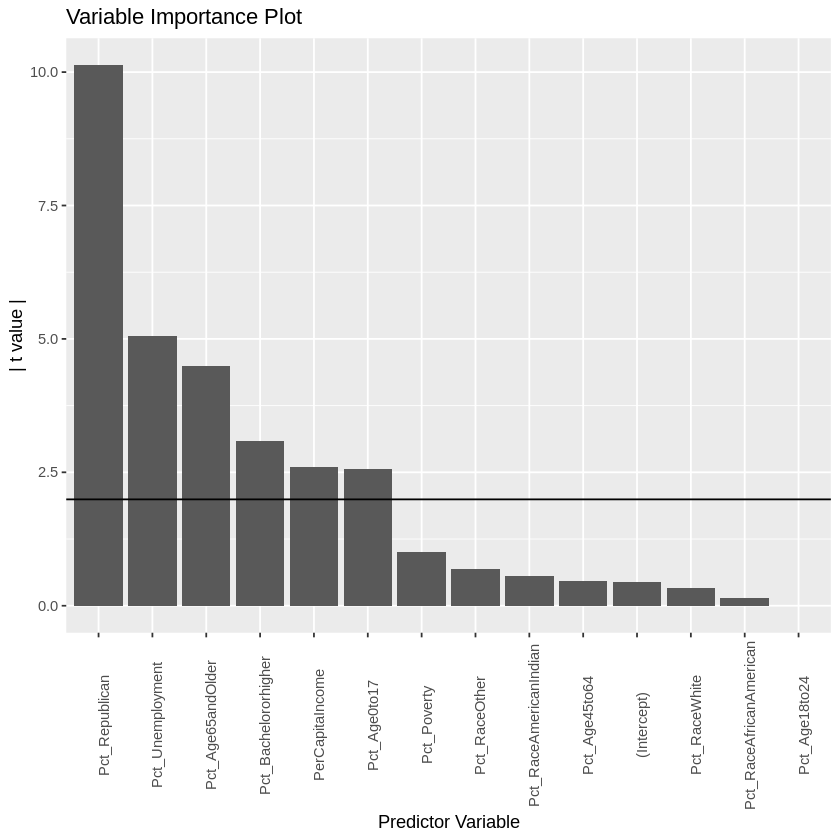

In [ ]:
ggplot(tvalue_df, aes(x=reorder(Predictor,-tvalues), y=tvalues))+
 geom_bar(stat="identity") +
 theme(axis.text.x=element_text(angle=90)) +
 labs(title="Variable Importance Plot",
        x ="Predictor Variable", y = "| t value |") + 
 geom_hline(yintercept=1.993)  #Bars above this line are statistically significant



---



---



## Dropping insignificant predictors

**Step 0: Initial Model**

PctYes∼PctRepublican+PerCapitaIncome+PctBachelorHigher+PctUnemployment+PctPoverty+PctAge0to17+PctAge18to24+PctAge45to64+PctAge65andOlder+PctRaceWhite+PctRaceAfricanAmerican+PctRaceAmericanIndian+PctRaceOther

In [ ]:
#Fitting an initial model
Model_Step0 <- lm(Pct_Yes ~ Pct_Republican 
                              + PerCapitaIncome + Pct_Bachelororhigher 
                              + Pct_Unemployment + Pct_Poverty 
                              + Pct_Age0to17 + Pct_Age18to24 + Pct_Age45to64 + Pct_Age65andOlder
                              + Pct_RaceWhite + Pct_RaceAfricanAmerican + Pct_RaceAmericanIndian + Pct_RaceOther ,
                              data=MN_Marriage_Amendment
                   )
summary(Model_Step0)


Call:
lm(formula = Pct_Yes ~ Pct_Republican + PerCapitaIncome + Pct_Bachelororhigher + 
    Pct_Unemployment + Pct_Poverty + Pct_Age0to17 + Pct_Age18to24 + 
    Pct_Age45to64 + Pct_Age65andOlder + Pct_RaceWhite + Pct_RaceAfricanAmerican + 
    Pct_RaceAmericanIndian + Pct_RaceOther, data = MN_Marriage_Amendment)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3185 -1.4731 -0.0521  1.4843  6.4936 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             18.8512110 41.6679373   0.452  0.65231    
Pct_Republican           0.5268397  0.0520197  10.128 1.48e-15 ***
PerCapitaIncome         -0.0005900  0.0002270  -2.599  0.01129 *  
Pct_Bachelororhigher    -0.3185019  0.1030311  -3.091  0.00282 ** 
Pct_Unemployment        -1.6493002  0.3258654  -5.061 3.01e-06 ***
Pct_Poverty              0.1833830  0.1831922   1.001  0.32011    
Pct_Age0to17             1.1719541  0.4567580   2.566  0.01235 *  
Pct_Age18to24            0.0003671  0.33

**Step 1: Drop % Age 18 to 24**

PctYes∼PctRepublican+PerCapitaIncome+PctBachelorHigher+PctUnemployment+PctPoverty+PctAge0to17 +PctAge45to64+PctAge65andOlder+PctRaceWhite+PctRaceAfricanAmerican+PctRaceAmericanIndian+PctRaceOther



In [ ]:
Model_Step1 <- lm(Pct_Yes ~ Pct_Republican 
                              + PerCapitaIncome + Pct_Bachelororhigher 
                              + Pct_Unemployment + Pct_Poverty 
                              + Pct_Age0to17 +                 Pct_Age45to64 + Pct_Age65andOlder
                              + Pct_RaceWhite + Pct_RaceAfricanAmerican + Pct_RaceAmericanIndian + Pct_RaceOther ,
                              data=MN_Marriage_Amendment
                   )
summary(Model_Step1)


Call:
lm(formula = Pct_Yes ~ Pct_Republican + PerCapitaIncome + Pct_Bachelororhigher + 
    Pct_Unemployment + Pct_Poverty + Pct_Age0to17 + Pct_Age45to64 + 
    Pct_Age65andOlder + Pct_RaceWhite + Pct_RaceAfricanAmerican + 
    Pct_RaceAmericanIndian + Pct_RaceOther, data = MN_Marriage_Amendment)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3183 -1.4733 -0.0522  1.4844  6.4936 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             18.8837044 29.1055100   0.649  0.51848    
Pct_Republican           0.5268479  0.0511360  10.303 6.03e-16 ***
PerCapitaIncome         -0.0005901  0.0002180  -2.706  0.00844 ** 
Pct_Bachelororhigher    -0.3184619  0.0956905  -3.328  0.00136 ** 
Pct_Unemployment        -1.6493833  0.3147958  -5.240 1.46e-06 ***
Pct_Poverty              0.1834361  0.1754878   1.045  0.29929    
Pct_Age0to17             1.1715139  0.2166397   5.408 7.50e-07 ***
Pct_Age45to64            0.1501812  0.1763738   0.851  0

**Step 2: Drop % African-American**

PctYes∼PctRepublican+PerCapitaIncome+PctBachelorHigher+PctUnemployment+PctPoverty+PctAge0to17 +PctAge45to64+PctAge65andOlder+PctRaceWhite+PctRaceAmericanIndian+PctRaceOther



In [ ]:
Model_Step2 <- lm(Pct_Yes ~ Pct_Republican 
                              + PerCapitaIncome + Pct_Bachelororhigher 
                              + Pct_Unemployment + Pct_Poverty 
                              + Pct_Age0to17 +                 Pct_Age45to64 + Pct_Age65andOlder
                              + Pct_RaceWhite +                Pct_RaceAmericanIndian + Pct_RaceOther ,
                              data=MN_Marriage_Amendment
                   )
summary(Model_Step2)


Call:
lm(formula = Pct_Yes ~ Pct_Republican + PerCapitaIncome + Pct_Bachelororhigher + 
    Pct_Unemployment + Pct_Poverty + Pct_Age0to17 + Pct_Age45to64 + 
    Pct_Age65andOlder + Pct_RaceWhite + Pct_RaceAmericanIndian + 
    Pct_RaceOther, data = MN_Marriage_Amendment)

Residuals:
   Min     1Q Median     3Q    Max 
-5.295 -1.486 -0.037  1.488  6.468 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            22.5680898 16.1738182   1.395 0.167029    
Pct_Republican          0.5259431  0.0504598  10.423 3.08e-16 ***
PerCapitaIncome        -0.0005810  0.0002084  -2.788 0.006716 ** 
Pct_Bachelororhigher   -0.3209729  0.0936514  -3.427 0.000993 ***
Pct_Unemployment       -1.6439302  0.3107208  -5.291 1.17e-06 ***
Pct_Poverty             0.1883952  0.1713304   1.100 0.275023    
Pct_Age0to17            1.1654716  0.2116045   5.508 4.88e-07 ***
Pct_Age45to64           0.1452292  0.1722347   0.843 0.401795    
Pct_Age65andOlder       1.0381535 

**Step 3: Drop % Age 45 to 64**

PctYes∼PctRepublican+PerCapitaIncome+PctBachelorHigher+PctUnemployment+PctPoverty+PctAge0to17+PctAge65andOlder+PctRaceWhite+PctRaceAmericanIndian+PctRaceOther

In [ ]:
Model_Step3 <- lm(Pct_Yes ~ Pct_Republican 
                              + PerCapitaIncome + Pct_Bachelororhigher 
                              + Pct_Unemployment + Pct_Poverty 
                              + Pct_Age0to17 +                                        Pct_Age65andOlder
                              + Pct_RaceWhite +                Pct_RaceAmericanIndian + Pct_RaceOther ,
                              data=MN_Marriage_Amendment
                   )
summary(Model_Step3)


Call:
lm(formula = Pct_Yes ~ Pct_Republican + PerCapitaIncome + Pct_Bachelororhigher + 
    Pct_Unemployment + Pct_Poverty + Pct_Age0to17 + Pct_Age65andOlder + 
    Pct_RaceWhite + Pct_RaceAmericanIndian + Pct_RaceOther, data = MN_Marriage_Amendment)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2775 -1.4429 -0.1676  1.5936  6.6581 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            25.2877871 15.8187804   1.599  0.11406    
Pct_Republican          0.5276101  0.0503251  10.484  < 2e-16 ***
PerCapitaIncome        -0.0005117  0.0001911  -2.677  0.00909 ** 
Pct_Bachelororhigher   -0.3429724  0.0897726  -3.820  0.00027 ***
Pct_Unemployment       -1.5558395  0.2920745  -5.327 9.85e-07 ***
Pct_Poverty             0.1655801  0.1688584   0.981  0.32991    
Pct_Age0to17            1.1050744  0.1987337   5.561 3.83e-07 ***
Pct_Age65andOlder       1.0723398  0.1177388   9.108 8.30e-14 ***
Pct_RaceWhite          -0.1196511  0.1186912 

**Step 4: Drop % Race Other**

PctYes∼PctRepublican+PerCapitaIncome+PctBachelorHigher+PctUnemployment+PctPoverty+PctAge0to17+PctAge65andOlder+PctRaceWhite+PctRaceAmericanIndian

In [ ]:
Model_Step4 <- lm(Pct_Yes ~ Pct_Republican 
                              + PerCapitaIncome + Pct_Bachelororhigher 
                              + Pct_Unemployment + Pct_Poverty 
                              + Pct_Age0to17 +                                        Pct_Age65andOlder
                              + Pct_RaceWhite +                Pct_RaceAmericanIndian                   ,
                              data=MN_Marriage_Amendment
                   )
summary(Model_Step4)


Call:
lm(formula = Pct_Yes ~ Pct_Republican + PerCapitaIncome + Pct_Bachelororhigher + 
    Pct_Unemployment + Pct_Poverty + Pct_Age0to17 + Pct_Age65andOlder + 
    Pct_RaceWhite + Pct_RaceAmericanIndian, data = MN_Marriage_Amendment)

Residuals:
   Min     1Q Median     3Q    Max 
-5.216 -1.409 -0.181  1.440  6.680 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            33.3435952 12.3799198   2.693 0.008678 ** 
Pct_Republican          0.5290464  0.0501880  10.541  < 2e-16 ***
PerCapitaIncome        -0.0005438  0.0001867  -2.913 0.004688 ** 
Pct_Bachelororhigher   -0.3552843  0.0883230  -4.023 0.000133 ***
Pct_Unemployment       -1.5850935  0.2892772  -5.479 5.19e-07 ***
Pct_Poverty             0.1394112  0.1654697   0.843 0.402108    
Pct_Age0to17            1.1170924  0.1977734   5.648 2.60e-07 ***
Pct_Age65andOlder       1.0876708  0.1160014   9.376 2.26e-14 ***
Pct_RaceWhite          -0.1923185  0.0788902  -2.438 0.017083 *  
Pct_R

**Step 5: Drop % Poverty**

PctYes∼PctRepublican+PerCapitaIncome+PctBachelorHigher+PctUnemployment+PctAge0to17+PctAge65andOlder+PctRaceWhite+PctRaceAmericanIndian

In [ ]:
Model_Step5 <- lm(Pct_Yes ~ Pct_Republican 
                              + PerCapitaIncome + Pct_Bachelororhigher 
                              + Pct_Unemployment 
                              + Pct_Age0to17 +                                        Pct_Age65andOlder
                              + Pct_RaceWhite +                Pct_RaceAmericanIndian                   ,
                              data=MN_Marriage_Amendment
                   )
summary(Model_Step5)


Call:
lm(formula = Pct_Yes ~ Pct_Republican + PerCapitaIncome + Pct_Bachelororhigher + 
    Pct_Unemployment + Pct_Age0to17 + Pct_Age65andOlder + Pct_RaceWhite + 
    Pct_RaceAmericanIndian, data = MN_Marriage_Amendment)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3328 -1.3241 -0.2356  1.5393  6.6262 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            40.6209048  8.8522362   4.589 1.68e-05 ***
Pct_Republican          0.5315823  0.0500044  10.631  < 2e-16 ***
PerCapitaIncome        -0.0006374  0.0001498  -4.255 5.77e-05 ***
Pct_Bachelororhigher   -0.3369253  0.0854334  -3.944 0.000174 ***
Pct_Unemployment       -1.5011963  0.2710919  -5.538 3.99e-07 ***
Pct_Age0to17            1.0551382  0.1832527   5.758 1.61e-07 ***
Pct_Age65andOlder       1.0919821  0.1156727   9.440 1.51e-14 ***
Pct_RaceWhite          -0.2231627  0.0697513  -3.199 0.001992 ** 
Pct_RaceAmericanIndian -0.2816203  0.0892553  -3.155 0.002279 ** 
---
Signi

### Making a variable importance plot

In [ ]:
#Getting the cutoff for significant predictors (using t-distribution with df=78)
qt(0.05/2, df=78, lower.tail = FALSE)

[1] 1.9908

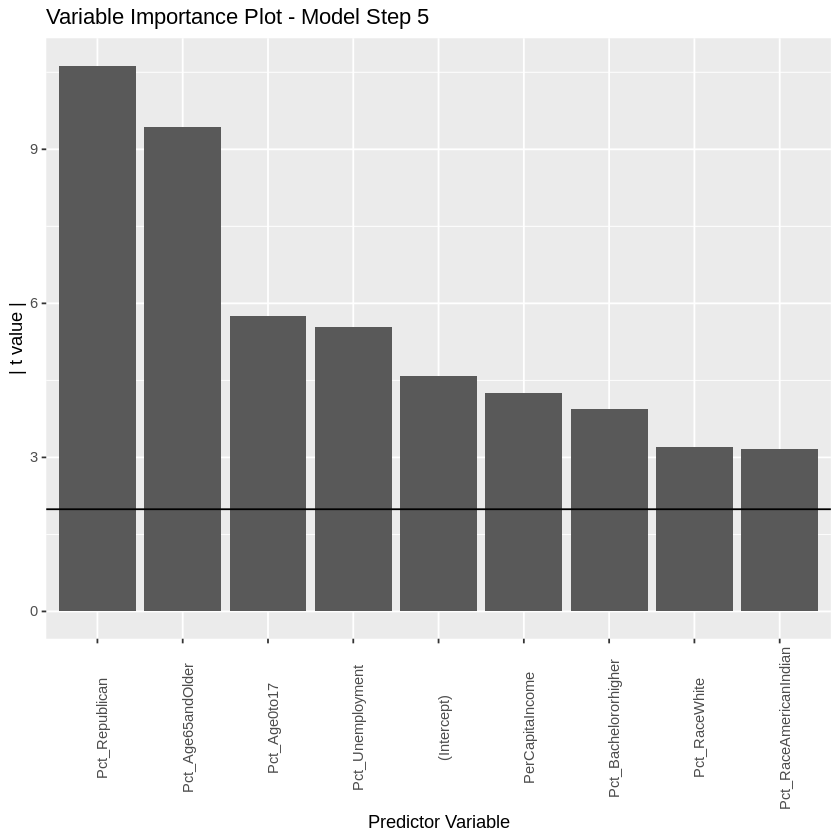

In [ ]:
#Getting the absolute t values from the model object
tvalue_df <- data.frame(tvalues = abs(summary(Model_Step5)$coefficients[,3]))

#Add a column for the predictor names
tvalue_df$Predictor <- rownames(tvalue_df)

#Creating the variable importance plot
ggplot(tvalue_df, aes(x=reorder(Predictor,-tvalues), y=tvalues))+
 geom_bar(stat="identity") +
 theme(axis.text.x=element_text(angle=90)) +
 labs(title="Variable Importance Plot - Model Step 5",
        x ="Predictor Variable", y = "| t value |") + 
 geom_hline(yintercept=1.9908)  #Bars above this line are statistically significant



---



---



Getting the Sums of Squared Residuals for Initial Model

In [ ]:
anova(Model_Step0)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Pct_Republican,1,2780.505076,2780.505076,473.6683278,1.211685e-33
PerCapitaIncome,1,1773.589820,1773.589820,302.1369503,1.168829e-27
Pct_Bachelororhigher,1,821.067112,821.067112,139.8715252,1.235964e-18
Pct_Unemployment,1,230.315632,230.315632,39.2350372,2.335733e-08
Pct_Poverty,1,43.037161,43.037161,7.3315241,8.433667e-03
Pct_Age0to17,1,8.093459,8.093459,1.3787478,2.441310e-01
Pct_Age18to24,1,295.496651,295.496651,50.3388416,6.942141e-10
Pct_Age45to64,1,54.723453,54.723453,9.3223231,3.157640e-03
Pct_Age65andOlder,1,115.913679,115.913679,19.7462823,3.092843e-05


Getting the Sums of Squared Residuals for model with only significant predictors

In [ ]:
anova(Model_Step5)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Pct_Republican,1,2780.505076,2780.505076,492.2583768,1.951993e-35
PerCapitaIncome,1,1773.589820,1773.589820,313.9949116,4.519537e-29
Pct_Bachelororhigher,1,821.067112,821.067112,145.3610594,1.680011e-19
Pct_Unemployment,1,230.315632,230.315632,40.7748937,1.133064e-08
Pct_Age0to17,1,2.110829,2.110829,0.3736995,5.427721e-01
Pct_Age65andOlder,1,495.122962,495.122962,87.6561700,2.140914e-14
Pct_RaceWhite,1,11.004624,11.004624,1.9482497,1.667362e-01
Pct_RaceAmericanIndian,1,56.232934,56.232934,9.9554333,2.278810e-03
Residuals,78,440.580407,5.648467,NA,NA


End of Document